# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up constants

In [3]:
FULL_METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
REDUCED_METRICS_PATH = "../data/processed/xgboost_reduced_model_metrics.xlsx"
SCORING_METRICS = ["precision_weighted", "recall_weighted", "roc_auc", "f1_weighted"]
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Read in data

In [4]:
df_full_metrics = pd.read_excel(FULL_METRICS_PATH)
df_full_metrics["raw_metric"] = pd.eval(df_full_metrics["raw_metric"])
df_full_metrics.insert(1, "feature_set", "Full")
df_full_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.867344,0.022339,"[0.8494809688581315, 0.872005323868678, 0.8811..."
1,XGBClassifier,Full,Metal,recall_weighted,0.862319,0.025682,"[0.8529411764705882, 0.8695652173913043, 0.882..."
2,XGBClassifier,Full,Metal,roc_auc,0.929082,0.020892,"[0.9336842105263157, 0.9084210526315789, 0.943..."
3,XGBClassifier,Full,Metal,f1_weighted,0.862833,0.020441,"[0.8503267973856209, 0.8705786966656531, 0.877..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.854745,0.023912,"[0.8410668615272195, 0.8146684233640756, 0.840..."
...,...,...,...,...,...,...,...
91,GradientBoostingClassifier,Full,MIT,f1_weighted,0.880554,0.019576,"[0.8846773194599282, 0.8764302059496567, 0.871..."
92,GradientBoostingClassifier,Full,Multiclass,precision_weighted,0.790504,0.028212,"[0.7571759987417427, 0.7617647058823529, 0.772..."
93,GradientBoostingClassifier,Full,Multiclass,recall_weighted,0.782609,0.028240,"[0.75, 0.7536231884057971, 0.7681159420289855,..."
94,GradientBoostingClassifier,Full,Multiclass,roc_auc_ovr_weighted,0.917268,0.008686,"[0.9124186606460766, 0.9241106719367589, 0.919..."


In [5]:
df_reduced_metrics = pd.read_excel(REDUCED_METRICS_PATH)
df_reduced_metrics["raw_metric"] = pd.eval(df_reduced_metrics["raw_metric"])
df_reduced_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Reduced,Metal,precision_weighted,0.868040,0.015732,"[0.8700980392156863, 0.868935097668557, 0.8681..."
1,XGBClassifier,Reduced,Metal,recall_weighted,0.855072,0.015612,"[0.8676470588235294, 0.855072463768116, 0.8550..."
2,XGBClassifier,Reduced,Metal,roc_auc,0.904844,0.005545,"[0.9273684210526315, 0.9, 0.9031578947368422, ..."
3,XGBClassifier,Reduced,Metal,f1_weighted,0.858765,0.013793,"[0.8686616597471659, 0.8589544513457559, 0.858..."
4,XGBClassifier,Reduced,Insulator,precision_weighted,0.817037,0.012824,"[0.8120935330654, 0.7971014492753623, 0.810758..."
5,XGBClassifier,Reduced,Insulator,recall_weighted,0.811594,0.011029,"[0.8115942028985508, 0.7971014492753623, 0.808..."
6,XGBClassifier,Reduced,Insulator,roc_auc,0.891020,0.015879,"[0.890625, 0.8897306397306397, 0.9074074074074..."
7,XGBClassifier,Reduced,Insulator,f1_weighted,0.811515,0.011210,"[0.8116734149217173, 0.7971014492753623, 0.808..."
8,XGBClassifier,Reduced,MIT,precision_weighted,0.877635,0.023554,"[0.862486126526082, 0.876911530162304, 0.86816..."
9,XGBClassifier,Reduced,MIT,recall_weighted,0.882353,0.014493,"[0.8529411764705882, 0.8823529411764706, 0.869..."


# Summary plot

## Bar plot version

In [6]:
df_for_plot = df_full_metrics.replace(
    {"metric_name": {"roc_auc_ovr_weighted": "roc_auc"}}).sort_values(by="metric_value", ignore_index=True, ascending=False)

/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

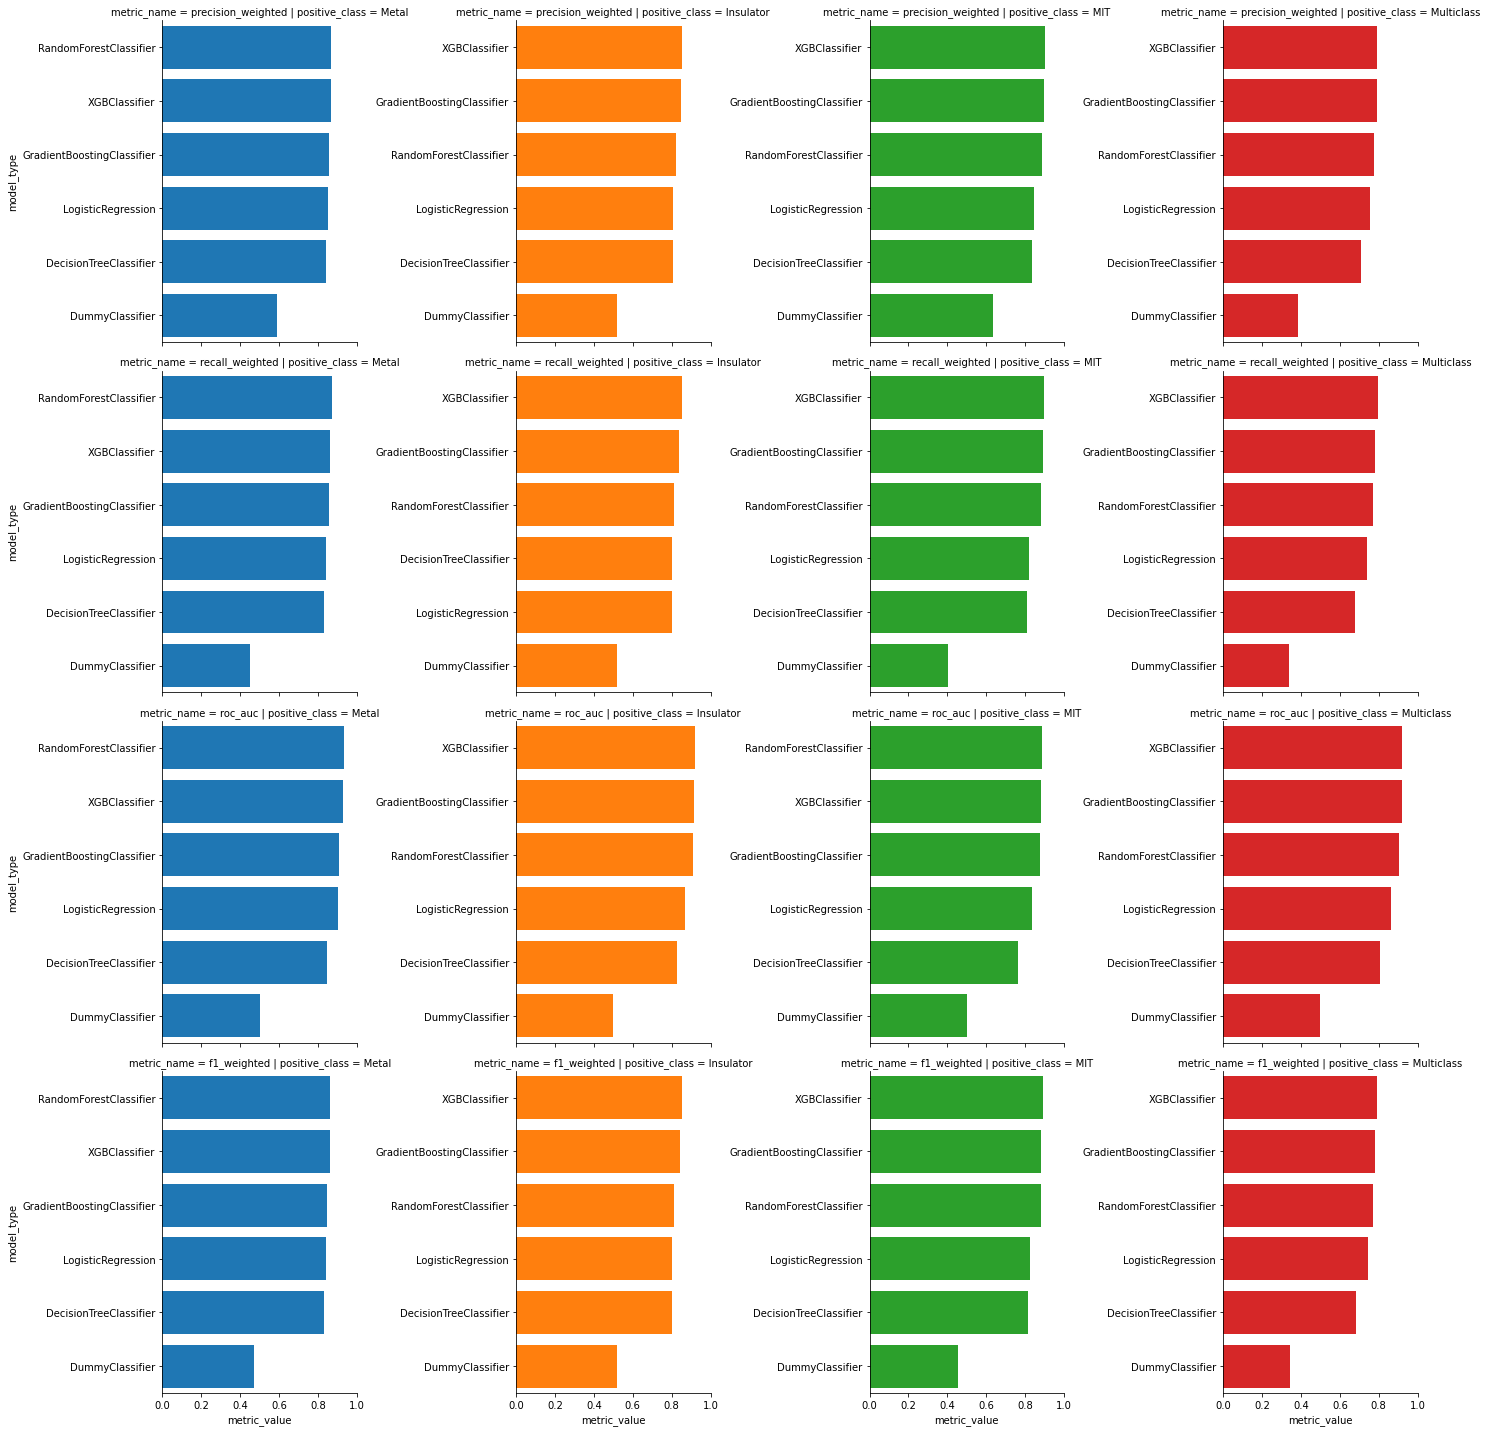

In [7]:
plt.figure(figsize=(10,10))
g_bar = sns.FacetGrid(df_for_plot, col="positive_class", row="metric_name", height=5, sharey=False,
                  col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                  hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                  xlim=(0, 1))
model_comparison_bar = g_bar.map(sns.barplot, "metric_value", "model_type", saturation=1)

In [8]:
def autolabel_bar(ax, **kwargs):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        width = rect.get_width()
        x, y, xerrs = get_errorbars(**kwargs)
        ax.errorbar(x, y, xerr=xerrs, capsize=3, ls="none", ecolor="black")
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(-1, -12),
                    textcoords="offset points",
                    ha='right', va='center', fontsize=10, color="white")

        
def get_errorbars(metric_name, positive_class, df_input=df_for_plot):
    """Attach errorbars to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    x_pos = df_selected.metric_value
    y_pos = range(len(df_selected.model_type))
    x_errs = df_selected.metric_dispersion / 2
    return x_pos, y_pos, x_errs

In [9]:
for (metric, pos_class), ax in g_bar.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_bar(ax, metric_name=metric, positive_class=pos_class)

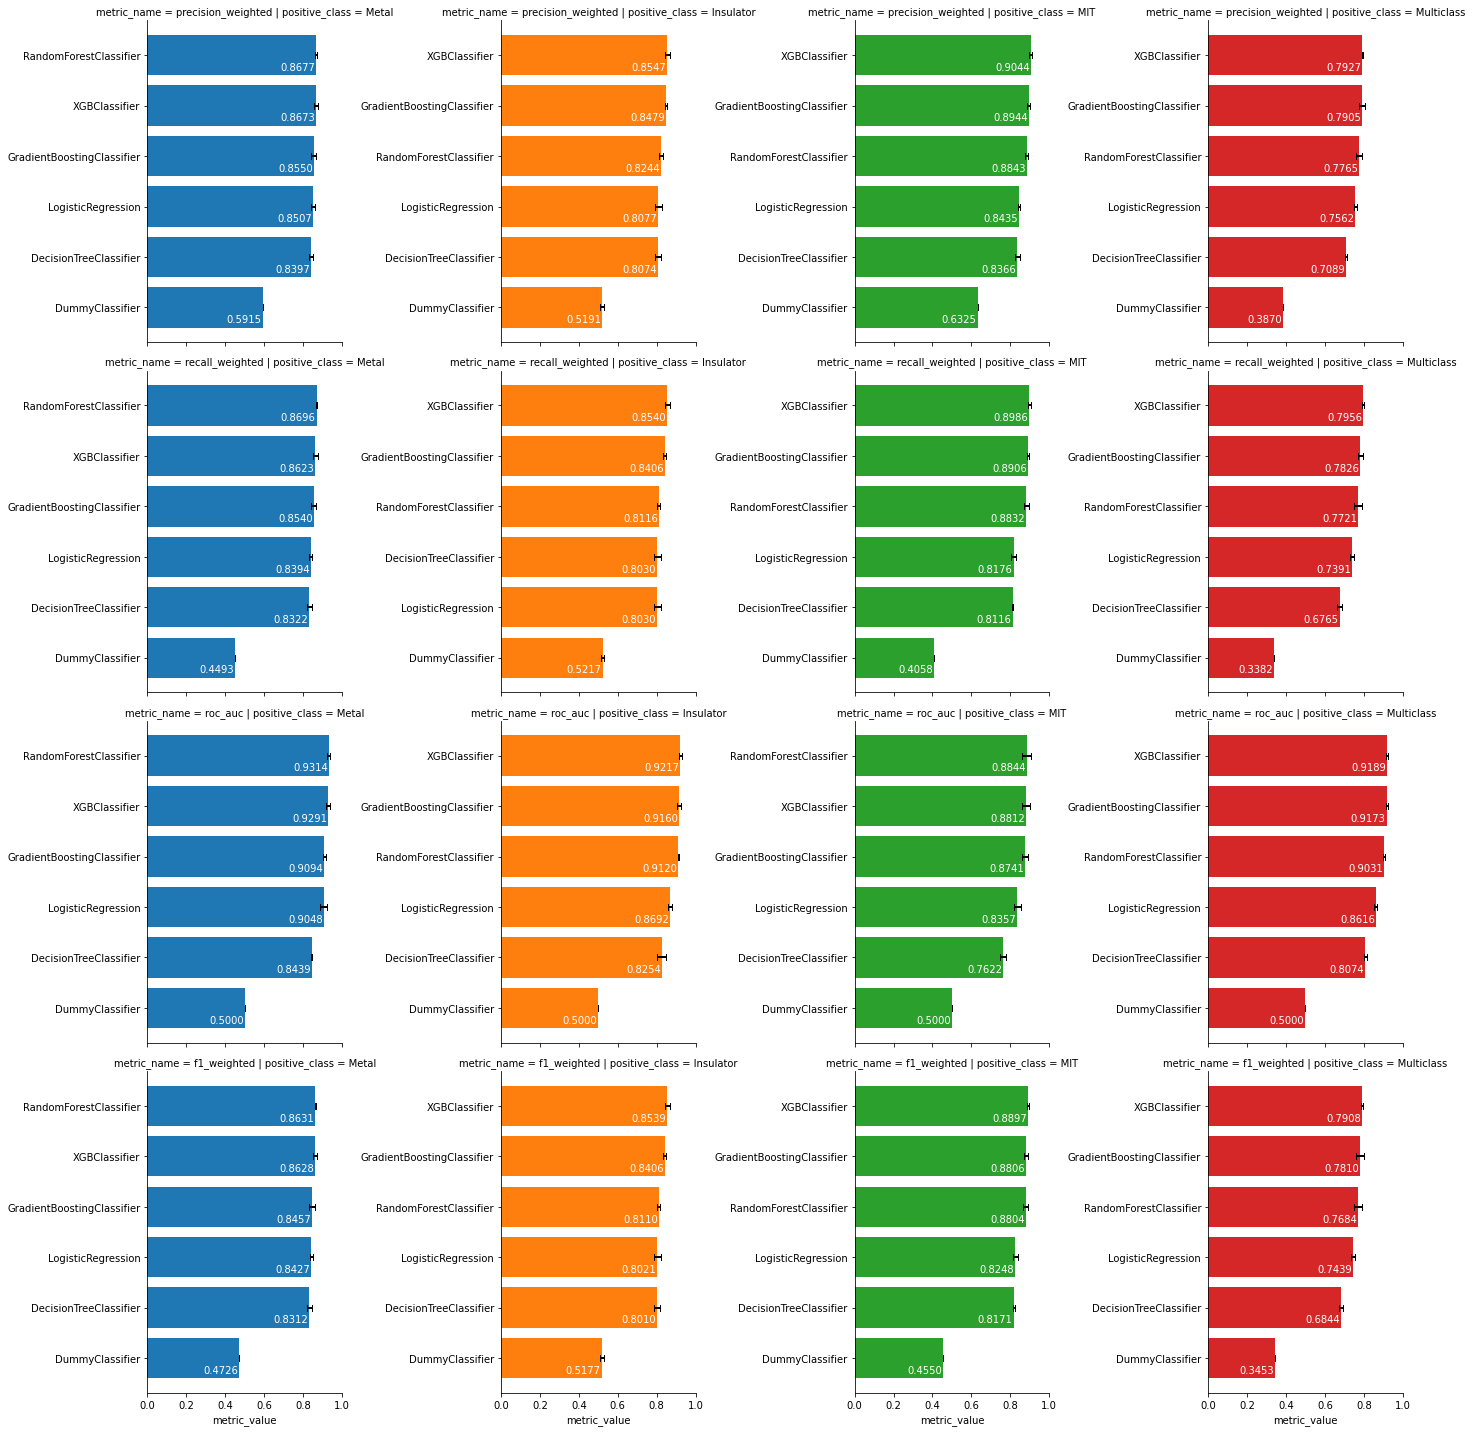

In [10]:
model_comparison_bar.fig

In [11]:
if SAVE_PLOT: model_comparison_bar.fig.savefig("../plots/model_comparison_bar.pdf", dpi=300, bbox_inches="tight")

## Boxplot version

In [12]:
df_for_boxplot = df_for_plot.drop(columns=["metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_for_boxplot

,model_type,feature_set,positive_class,metric_name,metric_value,raw_metric
0,RandomForestClassifier,Full,Metal,roc_auc,0.931407,0.949474
1,RandomForestClassifier,Full,Metal,roc_auc,0.931407,0.941053
2,RandomForestClassifier,Full,Metal,roc_auc,0.931407,0.936842
3,RandomForestClassifier,Full,Metal,roc_auc,0.931407,0.930183
4,RandomForestClassifier,Full,Metal,roc_auc,0.931407,0.929474
...,...,...,...,...,...,...
955,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
956,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
957,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235
958,DummyClassifier,Full,Multiclass,recall_weighted,0.338235,0.338235


/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<Figure size 720x720 with 0 Axes>

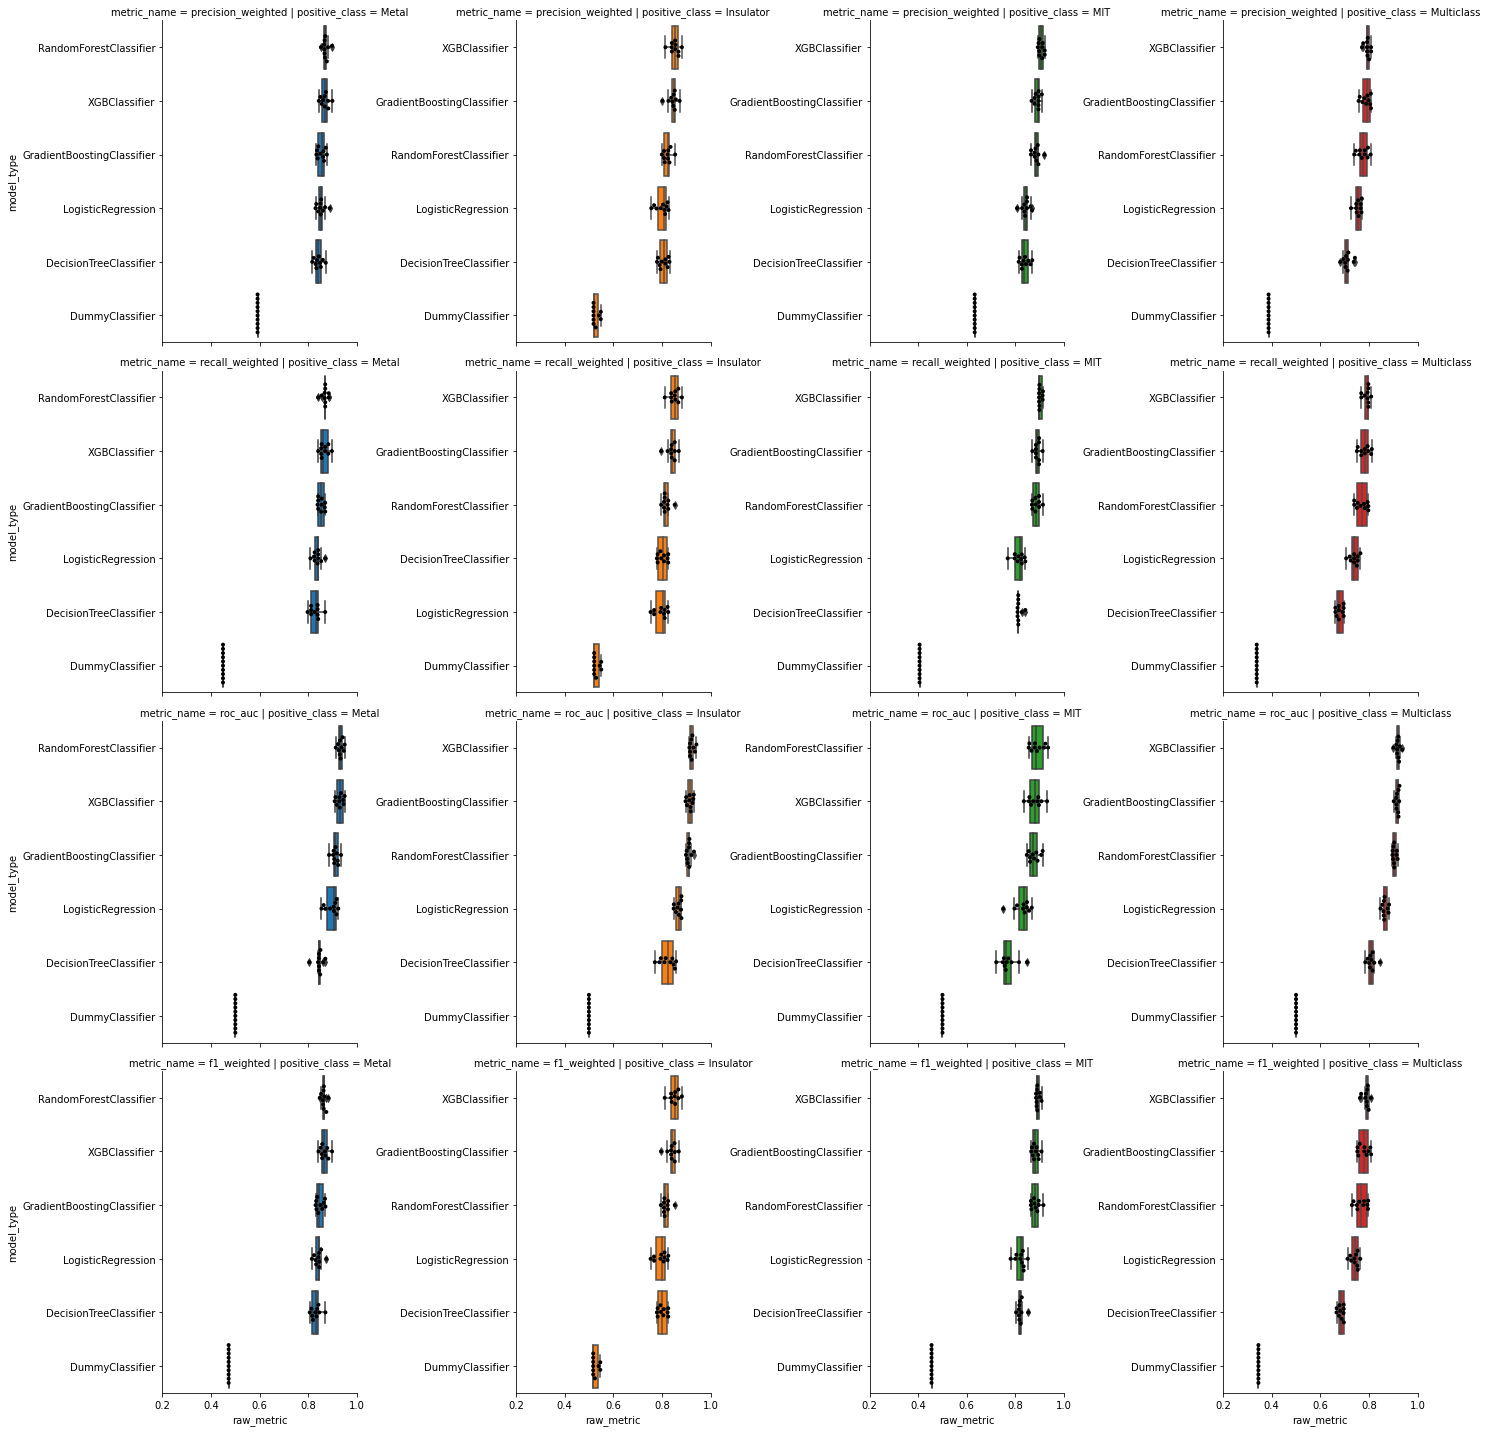

In [13]:
plt.figure(figsize=(10,10))

def fixed_boxplot(*args, label=None, **kwargs):
    """
    Custom boxplot function as a workaround for label error when sns.boxplot is passed to FacetGrid
    Adapted from https://github.com/mwaskom/seaborn/issues/915
    """
    sns.boxplot(*args, **kwargs, labels=[label])
    
g_box = sns.FacetGrid(data=df_for_boxplot, col="positive_class", row="metric_name", height=5, sharey=False, #aspect=2,
                      col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                      hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                      xlim=(0.2, 1))
model_comparison_boxplot = g_box.map(fixed_boxplot, "raw_metric", "model_type", saturation=1)
# overlay swarmplots on top of boxplots
g_box.map(sns.swarmplot, "raw_metric", "model_type", color="black", size=4)

In [14]:
def autolabel_box(ax, **kwargs):
    """
    Attach a text label besides each model type name, displaying the median value for the boxplot.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    x_lst, y_lst, metric_lst = get_stats(**kwargs)
    for x, y, metric in zip(x_lst, y_lst, metric_lst):
        ax.annotate('{:.4f}'.format(metric),
                    xy=(x, y),
                    xytext=(-5, 0),
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color="black")
    
        
def get_stats(metric_name, positive_class, df_input=df_for_plot, text_h_pos=0.24):
    """Get the stats to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    num_models = len(df_selected.model_type)
    x_pos = [text_h_pos] * num_models
    y_pos = range(num_models)
    metric_values = df_selected.metric_value
    return x_pos, y_pos, metric_values

In [15]:
for (metric, pos_class), ax in g_box.axes_dict.items():
    ax.set_ylabel(None)
    autolabel_box(ax, metric_name=metric, positive_class=pos_class)

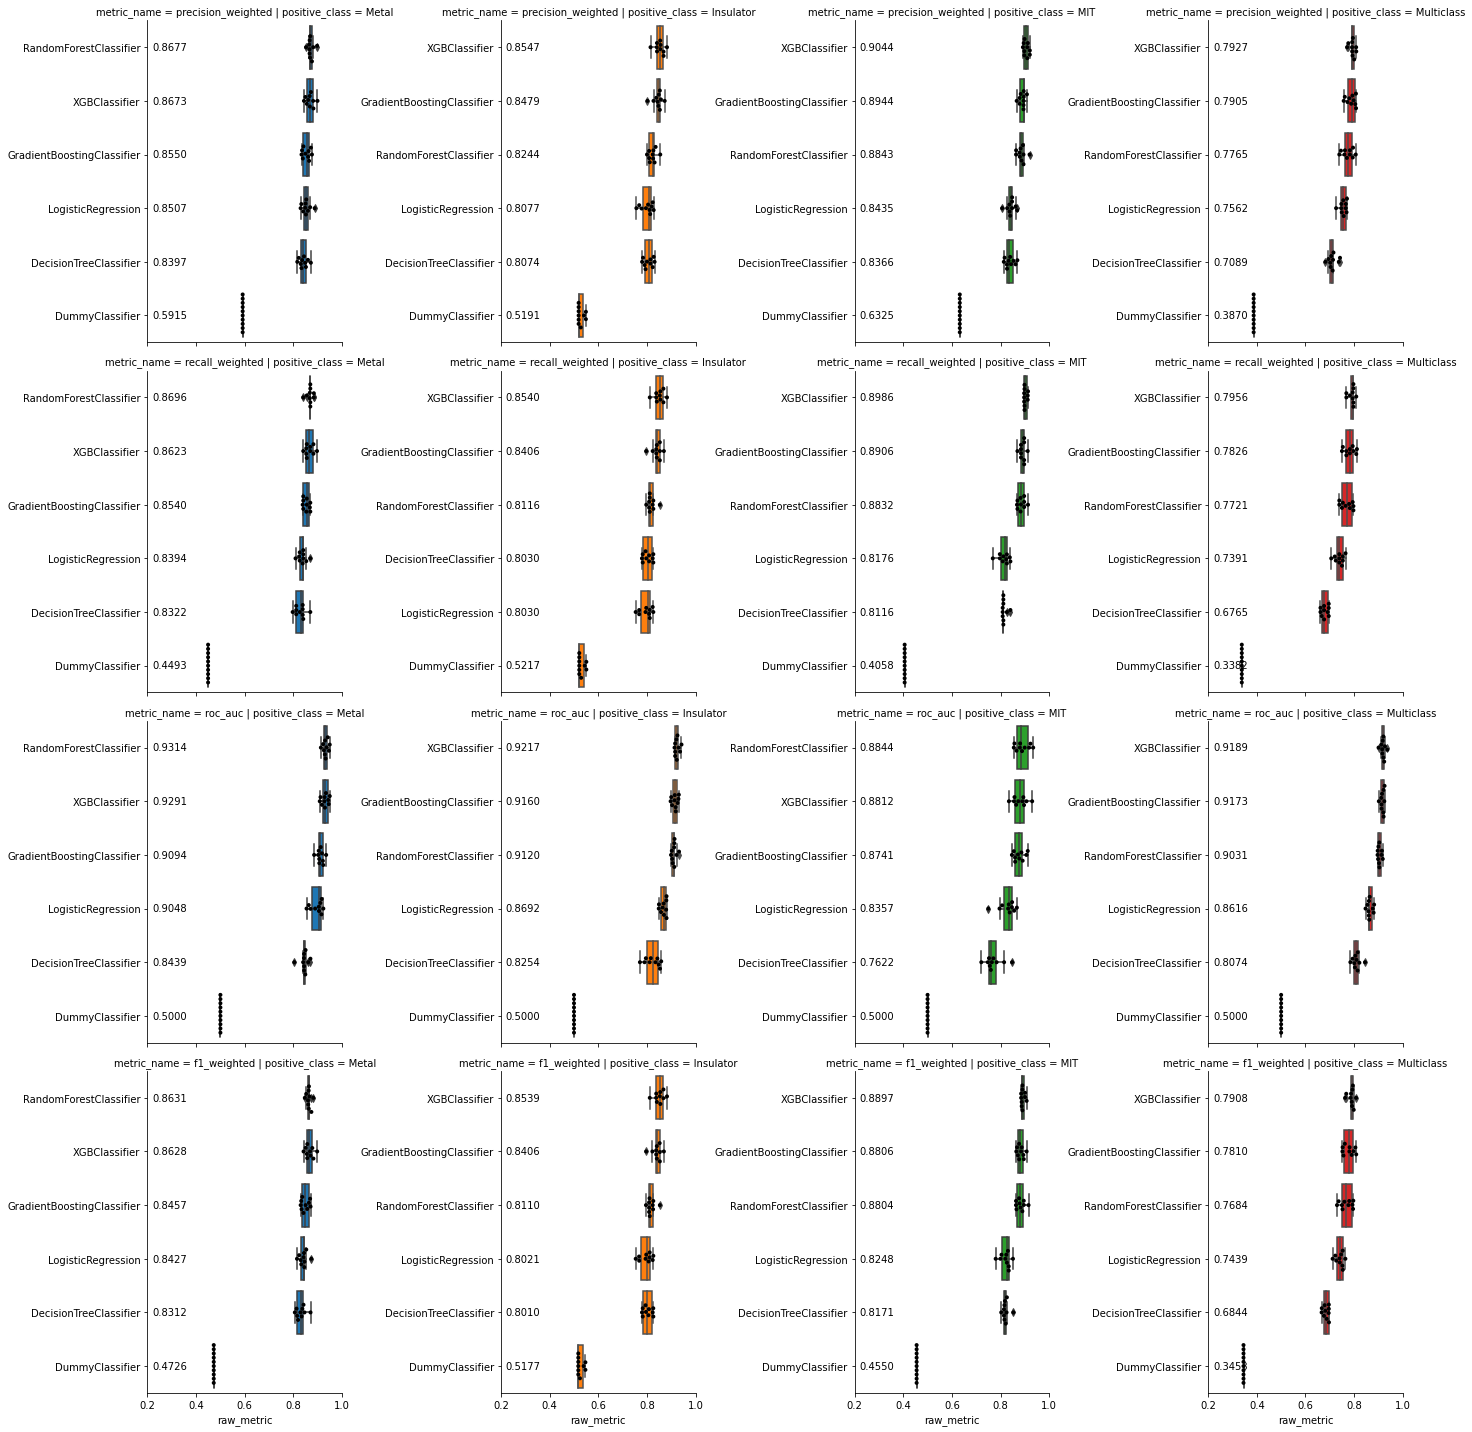

In [16]:
model_comparison_boxplot.fig

In [17]:
if SAVE_PLOT: model_comparison_boxplot.fig.savefig(SAVE_PATH + "model_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

# Compare metrics between the full feature set and reduced feature set models

In [18]:
TICK_SIZE = 19
BARWIDTH = 0.2
CAPSIZE = 5

In [19]:
df_combined_metrics = pd.concat([df_full_metrics, df_reduced_metrics], ignore_index=True)
df_combined_metrics = df_combined_metrics.query('model_type == "XGBClassifier" & positive_class != "Multiclass"')
df_combined_metrics["quartiles"] = df_combined_metrics.apply(lambda row: np.percentile(row["raw_metric"], [25, 75]) - row["metric_value"], axis=1)
df_combined_metrics

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric,quartiles
0,XGBClassifier,Full,Metal,precision_weighted,0.867344,0.022339,"[0.8494809688581315, 0.872005323868678, 0.8811...","[-0.010804949999323465, 0.01153419211089779]"
1,XGBClassifier,Full,Metal,recall_weighted,0.862319,0.025682,"[0.8529411764705882, 0.8695652173913043, 0.882...","[-0.008844842284740029, 0.016837169650468775]"
2,XGBClassifier,Full,Metal,roc_auc,0.929082,0.020892,"[0.9336842105263157, 0.9084210526315789, 0.943...","[-0.009183673469387754, 0.01170784103114908]"
3,XGBClassifier,Full,Metal,f1_weighted,0.862833,0.020441,"[0.8503267973856209, 0.8705786966656531, 0.877...","[-0.007324436412315283, 0.01311662158487914]"
4,XGBClassifier,Full,Insulator,precision_weighted,0.854745,0.023912,"[0.8410668615272195, 0.8146684233640756, 0.840...","[-0.013620396281042058, 0.0102916555918654]"
5,XGBClassifier,Full,Insulator,recall_weighted,0.854007,0.025682,"[0.8405797101449275, 0.8115942028985508, 0.838...","[-0.015185421994884818, 0.010496589940323986]"
6,XGBClassifier,Full,Insulator,roc_auc,0.921717,0.013564,"[0.9158249158249158, 0.9208754208754208, 0.930...","[-0.005892255892255838, 0.007671581890331902]"
7,XGBClassifier,Full,Insulator,f1_weighted,0.853854,0.025637,"[0.8406467357029915, 0.8115942028985508, 0.837...","[-0.015094389727208002, 0.010542236586130072]"
8,XGBClassifier,Full,MIT,precision_weighted,0.904393,0.013875,"[0.9100046750818139, 0.8977455716586151, 0.920...","[-0.006647150055284712, 0.007227828044025997]"
9,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.011029,"[0.8985507246376812, 0.8985507246376812, 0.911...","[-0.001118925831201989, 0.009910485933503854]"


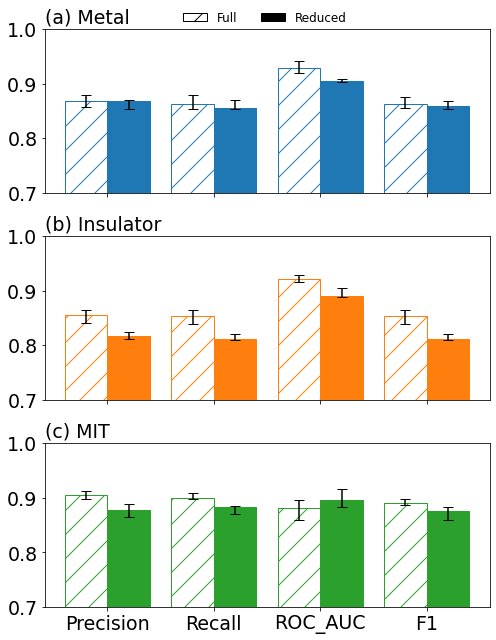

In [20]:
f, axarr = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(7, 9))

pos_classes = ["Metal", "Insulator", "MIT"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i, (pos_class, color) in enumerate(zip(pos_classes, colors)):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    df_subplot = df_combined_metrics.loc[df_combined_metrics.positive_class == pos_class]
    ax = sns.barplot(data=df_subplot, x="metric_name", y="metric_value", hue="feature_set", 
                     palette=sns.color_palette(("w", color)), hue_order=["Full", "Reduced"], saturation=1, ax=axarr[i], edgecolor=color, hatch="/")
    ax.errorbar(x=np.arange(4)-0.2, y=df_subplot.loc[df_subplot.feature_set == "Full"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Full"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    ax.errorbar(x=np.arange(4)+0.2, y=df_subplot.loc[df_subplot.feature_set == "Reduced"].metric_value, 
                yerr=abs(np.array(df_subplot.loc[df_subplot.feature_set == "Reduced"].quartiles.to_list()).T), ls="none", color="black", capsize=5)
    axarr[i] = ax
    if i == 0:
        axarr[i].legend(frameon=False, loc=(0.3, 1),
                        ncol=2, fontsize=12)
        leg = axarr[i].get_legend()
        leg.legendHandles[0].set_color("white")
        leg.legendHandles[0].set_edgecolor("black")
        leg.legendHandles[1].set_color("black")
    else:
        axarr[i].get_legend().remove()
    
    axarr[i].set_xlabel(None)
    axarr[i].set_ylabel(None)
    axarr[i].set_ylim(0.7, 1.0)
    axarr[i].set_yticks([0.7, 0.8, 0.9, 1])
    axarr[i].set_title(tit, loc='left', fontsize=TICK_SIZE)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0, 1, 2, 3), ('Precision', 'Recall', 'ROC_AUC','F1'))
plt.tight_layout()

In [21]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "full_reduced_models_comparison.pdf", dpi=300, bbox_inches="tight")

# Data exploration

In [22]:
df_full_metrics.loc[df_full_metrics.model_type == "XGBClassifier"]

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,Metal,precision_weighted,0.867344,0.022339,"[0.8494809688581315, 0.872005323868678, 0.8811..."
1,XGBClassifier,Full,Metal,recall_weighted,0.862319,0.025682,"[0.8529411764705882, 0.8695652173913043, 0.882..."
2,XGBClassifier,Full,Metal,roc_auc,0.929082,0.020892,"[0.9336842105263157, 0.9084210526315789, 0.943..."
3,XGBClassifier,Full,Metal,f1_weighted,0.862833,0.020441,"[0.8503267973856209, 0.8705786966656531, 0.877..."
4,XGBClassifier,Full,Insulator,precision_weighted,0.854745,0.023912,"[0.8410668615272195, 0.8146684233640756, 0.840..."
5,XGBClassifier,Full,Insulator,recall_weighted,0.854007,0.025682,"[0.8405797101449275, 0.8115942028985508, 0.838..."
6,XGBClassifier,Full,Insulator,roc_auc,0.921717,0.013564,"[0.9158249158249158, 0.9208754208754208, 0.930..."
7,XGBClassifier,Full,Insulator,f1_weighted,0.853854,0.025637,"[0.8406467357029915, 0.8115942028985508, 0.837..."
8,XGBClassifier,Full,MIT,precision_weighted,0.904393,0.013875,"[0.9100046750818139, 0.8977455716586151, 0.920..."
9,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.011029,"[0.8985507246376812, 0.8985507246376812, 0.911..."


In [23]:
def rank_metrics(metric_name, class_type, df_input=df_full_metrics):
    return df_input.loc[(df_input.positive_class == class_type) & (df_input.metric_name == metric_name)].sort_values(by="metric_value", ascending=False, ignore_index=True)

In [24]:
rank_metrics("precision_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,precision_weighted,0.904393,0.013875,"[0.9100046750818139, 0.8977455716586151, 0.920..."
1,GradientBoostingClassifier,Full,MIT,precision_weighted,0.894413,0.015463,"[0.8952205882352942, 0.8783591255219849, 0.883..."
2,RandomForestClassifier,Full,MIT,precision_weighted,0.884329,0.015226,"[0.8920385395537526, 0.8944327731092437, 0.879..."
3,LogisticRegression,Full,MIT,precision_weighted,0.843505,0.011316,"[0.836033634126333, 0.8397058823529412, 0.8067..."
4,DecisionTreeClassifier,Full,MIT,precision_weighted,0.836594,0.024275,"[0.8334812185743863, 0.8167471819645733, 0.826..."
5,DummyClassifier,Full,MIT,precision_weighted,0.632467,0.000000,"[0.6324673029338989, 0.6324673029338989, 0.632..."


In [25]:
rank_metrics("recall_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,recall_weighted,0.898551,0.011029,"[0.8985507246376812, 0.8985507246376812, 0.911..."
1,GradientBoostingClassifier,Full,MIT,recall_weighted,0.890558,0.013001,"[0.8970588235294118, 0.8840579710144928, 0.884..."
2,RandomForestClassifier,Full,MIT,recall_weighted,0.883205,0.024297,"[0.8970588235294118, 0.8970588235294118, 0.882..."
3,LogisticRegression,Full,MIT,recall_weighted,0.817562,0.026055,"[0.8260869565217391, 0.8088235294117647, 0.768..."
4,DecisionTreeClassifier,Full,MIT,recall_weighted,0.811594,0.002078,"[0.8088235294117647, 0.8115942028985508, 0.808..."
5,DummyClassifier,Full,MIT,recall_weighted,0.405797,0.000000,"[0.4057971014492754, 0.4057971014492754, 0.405..."


In [26]:
rank_metrics("roc_auc", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,Full,MIT,roc_auc,0.884416,0.043831,"[0.8657342657342657, 0.9174825174825176, 0.899..."
1,XGBClassifier,Full,MIT,roc_auc,0.881169,0.036713,"[0.8573426573426574, 0.8937062937062936, 0.896..."
2,GradientBoostingClassifier,Full,MIT,roc_auc,0.874126,0.029770,"[0.8601398601398601, 0.8713286713286713, 0.876..."
3,LogisticRegression,Full,MIT,roc_auc,0.835714,0.034690,"[0.8064935064935065, 0.8671328671328671, 0.749..."
4,DecisionTreeClassifier,Full,MIT,roc_auc,0.762238,0.027298,"[0.7524475524475525, 0.7209790209790209, 0.764..."
5,DummyClassifier,Full,MIT,roc_auc,0.500000,0.000000,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [27]:
rank_metrics("f1_weighted", "MIT")

,model_type,feature_set,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Full,MIT,f1_weighted,0.889729,0.010999,"[0.8846773194599282, 0.8897290485192186, 0.900..."
1,GradientBoostingClassifier,Full,MIT,f1_weighted,0.880554,0.019576,"[0.8846773194599282, 0.8764302059496567, 0.871..."
2,RandomForestClassifier,Full,MIT,f1_weighted,0.880427,0.025725,"[0.8897290485192186, 0.8954636989931107, 0.878..."
3,LogisticRegression,Full,MIT,f1_weighted,0.824822,0.024934,"[0.8302737520128824, 0.8196891659889761, 0.779..."
4,DecisionTreeClassifier,Full,MIT,f1_weighted,0.817051,0.009518,"[0.8160319235654301, 0.8139783319349498, 0.816..."
5,DummyClassifier,Full,MIT,f1_weighted,0.454999,0.000000,"[0.4549994444179881, 0.4549994444179881, 0.454..."
